# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv("C:/Users/Hanna/Desktop/DataLoves/data/yulu_rental.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [4]:
monthly_mean = df['count'].resample('ME').mean()

Text(0, 0.5, 'Кількість оренд')

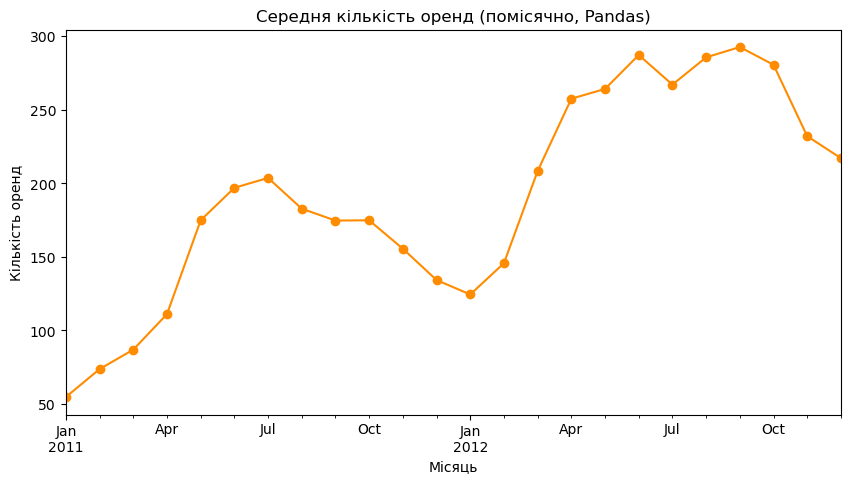

In [7]:
#Pandas
ax = monthly_mean.plot(
    marker='o',
    color='darkorange',
    figsize=(10, 5),
    title='Середня кількість оренд (помісячно, Pandas)')
ax.set_xlabel('Місяць')
ax.set_ylabel('Кількість оренд')

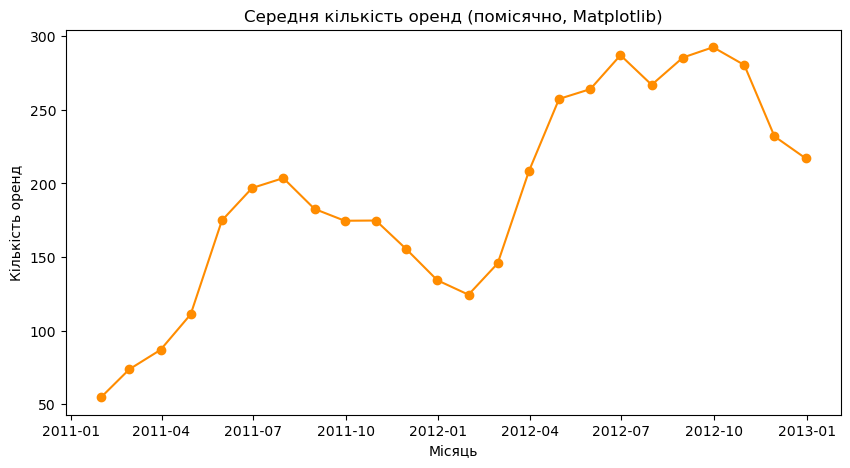

In [8]:
#Matplotlib
plt.figure(figsize=(10,5))
plt.plot(
    monthly_mean.index, 
    monthly_mean.values, 
    marker='o', 
    color='darkorange')
plt.title('Середня кількість оренд (помісячно, Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.show()

Графіки для мене дуже схожі. Мабуть Pandas подобається трішки більше, бо назва місяців легше сприймається  у такому форматі та і коду писати трішки менше.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [9]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

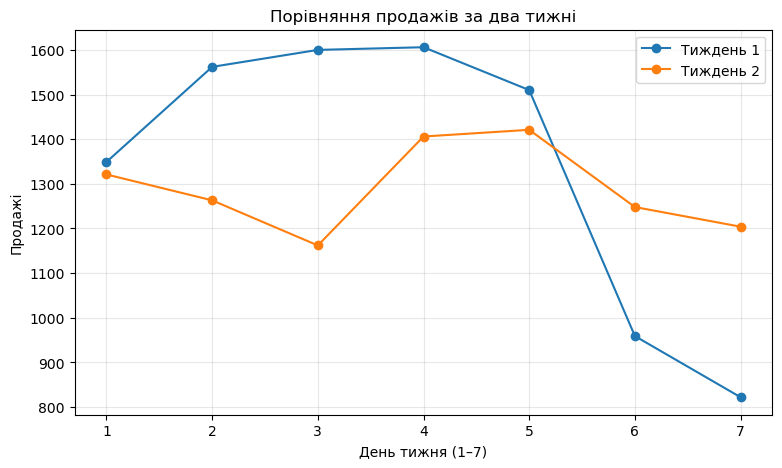

In [11]:
plt.figure(figsize=(9,5))
plt.plot(days, sales_week1, marker='o', label='Тиждень 1')
plt.plot(days, sales_week2, marker='o', label='Тиждень 2')
plt.title('Порівняння продажів за два тижні')
plt.xlabel('День тижня (1–7)')
plt.ylabel('Продажі')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Судячи з графіку, продажі були стабільніші під час 2 тижня. Зараз перевіримо обрахунками.

In [14]:
df = pd.DataFrame({
    'day': [1,2,3,4,5,6,7],
    'sales_week1': [1349,1562,1600,1606,1510,959,822],
    'sales_week2': [1321,1263,1162,1406,1421,1248,1204]
})

In [16]:
stats = df[['sales_week1','sales_week2']].agg(['mean','std'])
stats.loc['CV'] = stats.loc['std'] / stats.loc['mean']
stats = stats.round(2)
print(stats)

      sales_week1  sales_week2
mean      1344.00      1289.29
std        324.04        98.19
CV           0.24         0.08


Таким чином, продажі під час 2 тижня були значно стабільніші, оскільки коефіцієнт варіації та розкид значень значно менші, навіть попри трохи нижчий середній рівень продажів.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [31]:
import matplotlib.dates as mdates

df = pd.read_csv("C:/Users/Hanna/Desktop/DataLoves/data/yulu_rental.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

monthly_temp = df['temp'].resample('ME').mean()
season_hourly = df.groupby(['season','hour'])['count'].mean().unstack(0)
humidity = df['humidity']
temp_vs_count = df[['temp','count']]

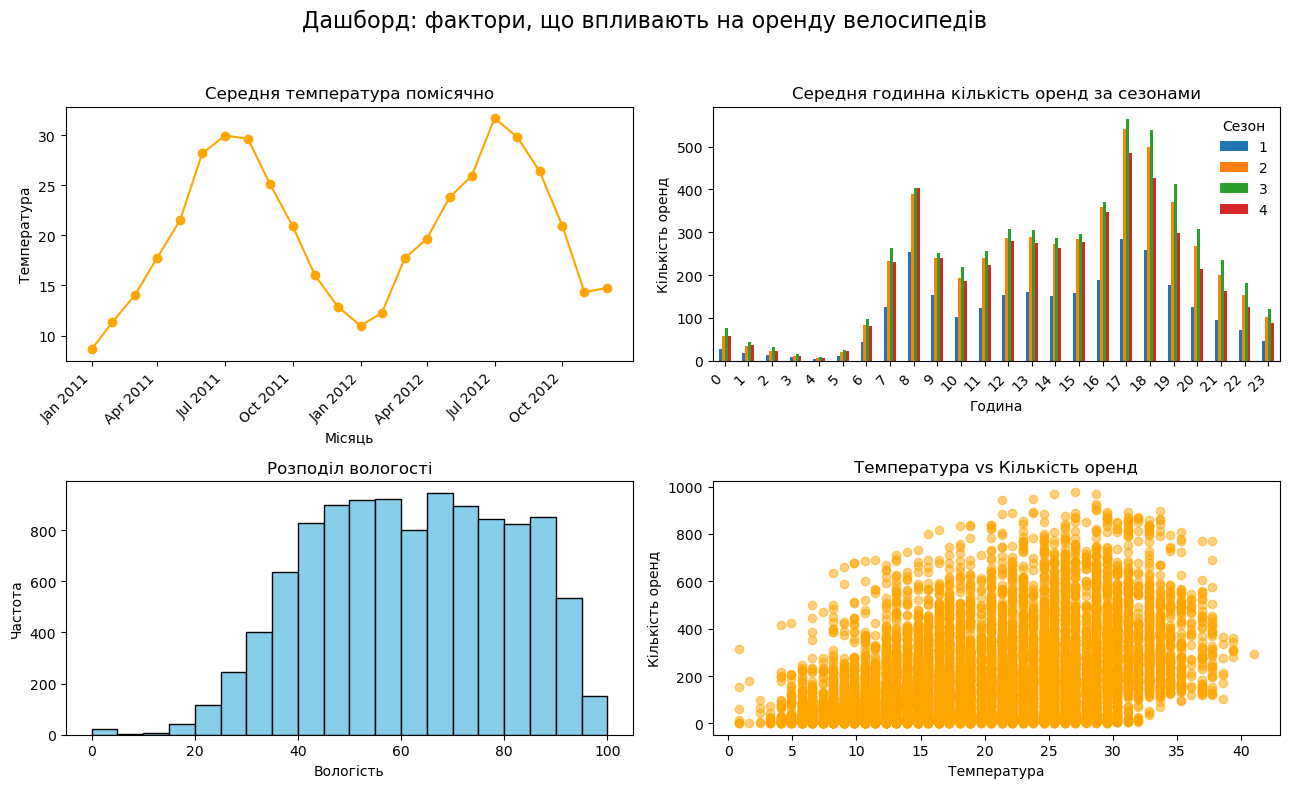

In [45]:
plt.figure(figsize=(13, 8))
plt.suptitle('Дашборд: фактори, що впливають на оренду велосипедів', fontsize=16)

# Лінійний графік середньої температури помісячно
plt.subplot(2, 2, 1)
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', color='orange')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура')

tick_idx = monthly_temp.index[::3] 
plt.xticks(tick_idx, [d.strftime('%b %Y') for d in tick_idx], rotation=45, ha='right')

#Стовпчикова діаграма середньої годинної кількості оренд за сезонами
plt.subplot(2, 2, 2)
season_hourly.plot(kind='bar', ax=plt.gca())
plt.title('Середня годинна кількість оренд за сезонами')
plt.xlabel('Година')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Сезон', frameon=False)

# Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(humidity, bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл вологості')
plt.xlabel('Вологість')
plt.ylabel('Частота')

# Scatter plot: температура vs кількість оренд
plt.subplot(2, 2, 4)
plt.scatter(temp_vs_count['temp'], temp_vs_count['count'], alpha=0.5, color='orange')
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

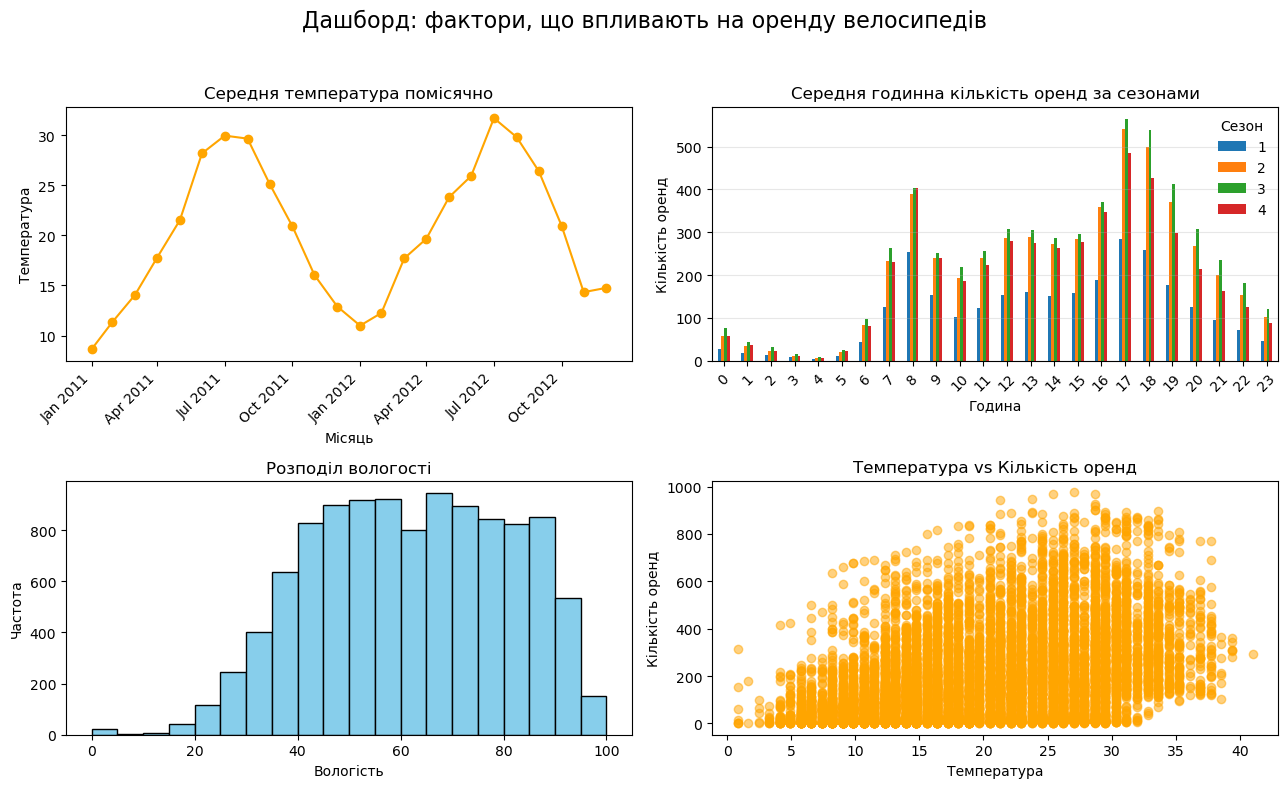

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle('Дашборд: фактори, що впливають на оренду велосипедів', fontsize=16)

# Лінійний графік середньої температури помісячно
axes[0,0].plot(monthly_temp.index, monthly_temp.values, marker='o', color='orange')
axes[0,0].set_title('Середня температура помісячно')
axes[0,0].set_xlabel('Місяць')
axes[0,0].set_ylabel('Температура')

tick_idx = monthly_temp.index[::3]
axes[0,0].set_xticks(tick_idx)
axes[0,0].set_xticklabels([d.strftime('%b %Y') for d in tick_idx], rotation=45, ha='right')

# Стовпчикова діаграма середньої годинної кількості оренд за сезонами
season_hourly.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Середня годинна кількість оренд за сезонами')
axes[0,1].set_xlabel('Година')
axes[0,1].set_ylabel('Кількість оренд')
axes[0,1].grid(axis='y', alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Сезон', frameon=False)

# Гістограма вологості
axes[1,0].hist(humidity, bins=20, color='skyblue', edgecolor='black')
axes[1,0].set_title('Розподіл вологості')
axes[1,0].set_xlabel('Вологість')
axes[1,0].set_ylabel('Частота')

# Scatter plot: температура vs кількість оренд
axes[1,1].scatter(temp_vs_count['temp'], temp_vs_count['count'], alpha=0.5, color='orange')
axes[1,1].set_title('Температура vs Кількість оренд')
axes[1,1].set_xlabel('Температура')
axes[1,1].set_ylabel('Кількість оренд')

# Охайне розташування
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

На нескладних графіках різниця не дуже помітна, але зі зростанням складності відображення Subplots більш гнучкий і масштабований метод, одна й та сама дія (наприклад, встановити сітку і заголовки) робиться в 2 рядки з subplots і в кілька повторів з subplot

In [50]:
monthly_stats = sales_data['sales'].resample('ME').agg(['mean', 'max', 'min'])
monthly_stats

NameError: name 'sales_data' is not defined

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

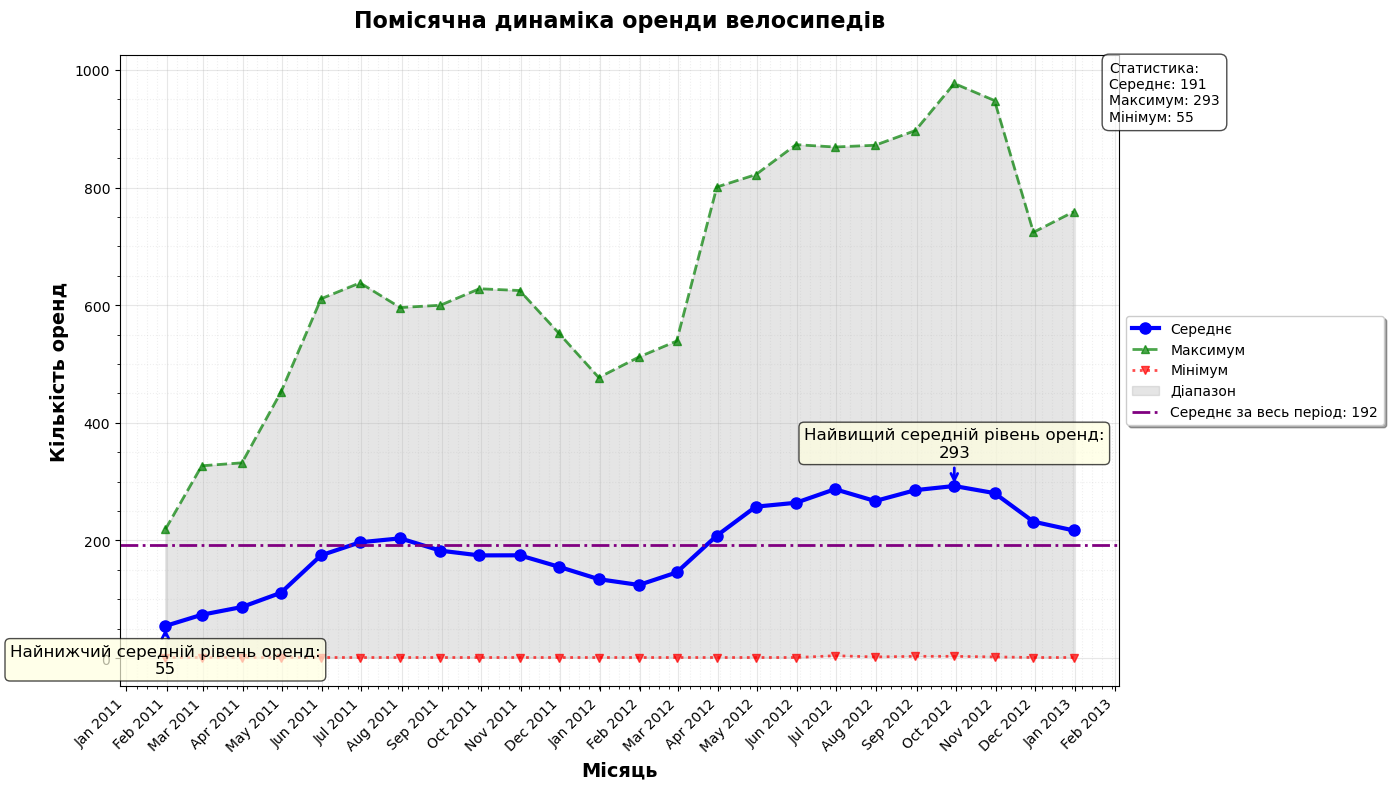

In [59]:
monthly_stats = df['count'].resample('ME').agg(['mean', 'max', 'min'])

fig, ax = plt.subplots(figsize=(14, 8))

# Лінії для середнього, максимуму і мінімуму
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

# Заливка між max та min
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон')

extremes = [
    ("Найвищий середній рівень оренд", monthly_stats['mean'].idxmax(), monthly_stats['mean'].max(), 50),
    ("Найнижчий середній рівень оренд", monthly_stats['mean'].idxmin(), monthly_stats['mean'].min(), -80)
]

# Анотації
for label, idx, val, offset in extremes:
    ax.annotate(f'{label}:\n{val:.0f}',
                xy=(idx, val),
                xytext=(idx, val + offset),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2),
                fontsize=12, ha='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')
ax.set_title('Помісячна динаміка оренди велосипедів',
             fontsize=16, fontweight='bold', pad=20)

# Форматування дати на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Сітка
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Лінія середнього значення за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за весь період: {overall_mean:.0f}')

# Легенда
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, shadow=True)


# Текстовий блок зі статистикою
avg_all = monthly_stats['mean'].mean()
max_all = monthly_stats['mean'].max()
min_all = monthly_stats['mean'].min()

stats_text = (f"Статистика:\n"
              f"Середнє: {avg_all:.0f}\n"
              f"Максимум: {max_all:.0f}\n"
              f"Мінімум: {min_all:.0f}")

ax.text(0.99, 0.99, stats_text,
        transform=ax.transAxes,
        fontsize=10,
        ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))


plt.tight_layout()
plt.show()

1. Анотації на графіку допомагають одразу помітити найважливіші точки, наприклад пік чи мінімум, і не потрібно довго шукати їх на осі.
2. Функція fill_between заповнює простір між лініями, у нашому випадку між мінімумом і максимумом, і наочно показує, як коливаються значення.
3. Текстовий блок у кутку з короткою статистикою дає загальне уявлення про дані, щоб не рахувати все самому й швидко зрозуміти, де середнє, де максимум і мінімум.